**CODERS CAVE INTERNSHIP - AUGUST SEPTEMBER 2023**\
**TASK - SPEECH EMOTION PREDICTION**\
**NINAD NILESH SUGANDHI**

1. [Importing Libraries](#importing_libraries)
2. [Loading Data](#loading_data)
3. [Data Preprocessing](#data_preprocessing)
4. [EDA](#eda) 📊
5. [Modeling](#modeling)
6. [Conclusion](#conclusion)

<a id="importing_libraries"></a>
**1. Importing Libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud


import os.path
import IPython.display
import itertools
import librosa
import librosa.display
import soundfile
import math
from pathlib import Path
from scipy.io import wavfile

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
import visualkeras

<a id="loading_data"></a>
**2. Loading Data**

In [2]:
dir = Path("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema")

In [3]:
filepaths = list(dir.glob(r'**/*.wav'))

In [4]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))

In [5]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

**These emotions are:**\
ANG: Anger 😡\
DIS: Disgust 🤢\
FEA: Fear 😱\
HAP: Happiness 😀\
NEU: Neutral 😐\
SAD: Sadness 😭

In [6]:
filepaths = pd.Series(filepaths, name='filepath').astype(str)
labels = pd.Series(labels, name='label')

df = pd.concat([filepaths, labels], axis=1)
df['label']

0       ANG
1       DIS
2       FEA
3       HAP
4       NEU
       ... 
7437    DIS
7438    FEA
7439    HAP
7440    NEU
7441    SAD
Name: label, Length: 7442, dtype: object

In [7]:
df

,filepath,label
0,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
1,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,DIS
2,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,FEA
3,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,HAP
4,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,NEU
...,...,...
7437,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,DIS
7438,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,FEA
7439,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,HAP
7440,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,NEU


<a id="data_preprocessing"></a>
**3. Data Preprocessing**

In [8]:
df.head(10)

,filepath,label
0,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
1,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,DIS
2,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,FEA
3,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,HAP
4,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,NEU
5,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,SAD
6,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
7,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
8,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
9,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,DIS


In [9]:
df.tail(10)

,filepath,label
7432,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,FEA
7433,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,HAP
7434,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,NEU
7435,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,SAD
7436,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
7437,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,DIS
7438,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,FEA
7439,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,HAP
7440,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,NEU
7441,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,SAD


In [10]:
df.isnull()

,filepath,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7437,False,False
7438,False,False
7439,False,False
7440,False,False


In [11]:
df.isnull().sum()

filepath    0
label       0
dtype: int64

In [12]:
df.shape

(7442, 2)

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.size

14884

In [15]:
df.dtypes

filepath    object
label       object
dtype: object

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7437    False
7438    False
7439    False
7440    False
7441    False
Length: 7442, dtype: bool

In [17]:
df.empty

False

In [18]:
df.index

RangeIndex(start=0, stop=7442, step=1)

In [19]:
df.max()

filepath    D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...
label                                                     SAD
dtype: object

In [20]:
df.min()

filepath    D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...
label                                                     ANG
dtype: object

In [21]:
df.values

array([['D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema\\1001_DFA_ANG_XX.wav',
        'ANG'],
       ['D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema\\1001_DFA_DIS_XX.wav',
        'DIS'],
       ['D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema\\1001_DFA_FEA_XX.wav',
        'FEA'],
       ...,
       ['D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema\\1091_WSI_HAP_XX.wav',
        'HAP'],
       ['D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema\\1091_WSI_NEU_XX.wav',
        'NEU'],
       ['D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Speech Emotion Detection Dataset\\Crema\\1091_WSI_SAD_XX.wav',
        'SAD']], dtype=object)

In [22]:
df.value_counts()

filepath                                                                                                        label
D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PROJECTS\Speech Emotion Detection Dataset\Crema\1001_DFA_ANG_XX.wav  ANG      1
D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PROJECTS\Speech Emotion Detection Dataset\Crema\1061_MTI_NEU_XX.wav  NEU      1
D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PROJECTS\Speech Emotion Detection Dataset\Crema\1061_TIE_NEU_XX.wav  NEU      1
D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PROJECTS\Speech Emotion Detection Dataset\Crema\1061_TIE_HAP_XX.wav  HAP      1
D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PROJECTS\Speech Emotion Detection Dataset\Crema\1061_TIE_FEA_XX.wav  FEA      1
                                                                                                                        ..
D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PROJECTS\Speech Emotion Detection Dataset\Crema\1031_ITS_DIS_XX.wav  DIS      1
D:\NINAD SUGANDHI\GOO

In [23]:
df.columns

Index(['filepath', 'label'], dtype='object')

In [24]:
df.info

<bound method DataFrame.info of                                                filepath label
0     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   ANG
1     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   DIS
2     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   FEA
3     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   HAP
4     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   NEU
...                                                 ...   ...
7437  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   DIS
7438  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   FEA
7439  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   HAP
7440  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   NEU
7441  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   SAD

[7442 rows x 2 columns]>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  7442 non-null   object
 1   label     7442 non-null   object
dtypes: object(2)
memory usage: 116.4+ KB


In [26]:
df.describe

<bound method NDFrame.describe of                                                filepath label
0     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   ANG
1     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   DIS
2     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   FEA
3     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   HAP
4     D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   NEU
...                                                 ...   ...
7437  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   DIS
7438  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   FEA
7439  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   HAP
7440  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   NEU
7441  D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...   SAD

[7442 rows x 2 columns]>

In [27]:
df.describe()

,filepath,label
count,7442,7442
unique,7442,6
top,D:\NINAD SUGANDHI\GOOGLE COLAB\CODERS CAVE PRO...,ANG
freq,1,1271


<a id="eda"></a>
**4. EDA 📊**

In [28]:
colors = ['cyan', 'blue', 'seagreen', 'orange', 'red', 'Purple']

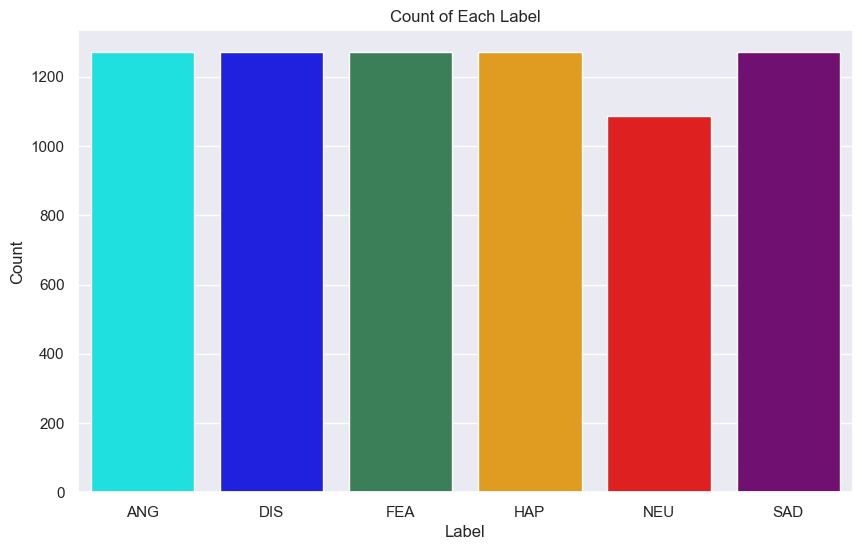

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', palette=colors)
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

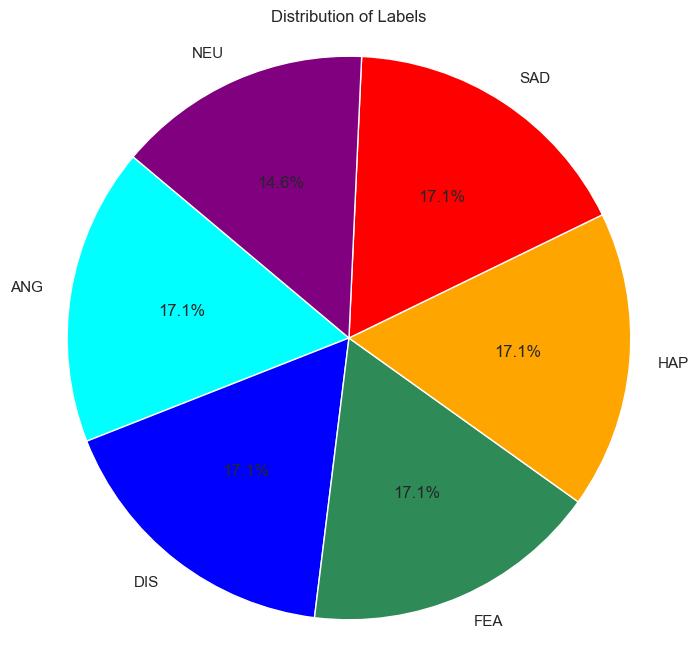

In [30]:
plt.figure(figsize=(8, 8))
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

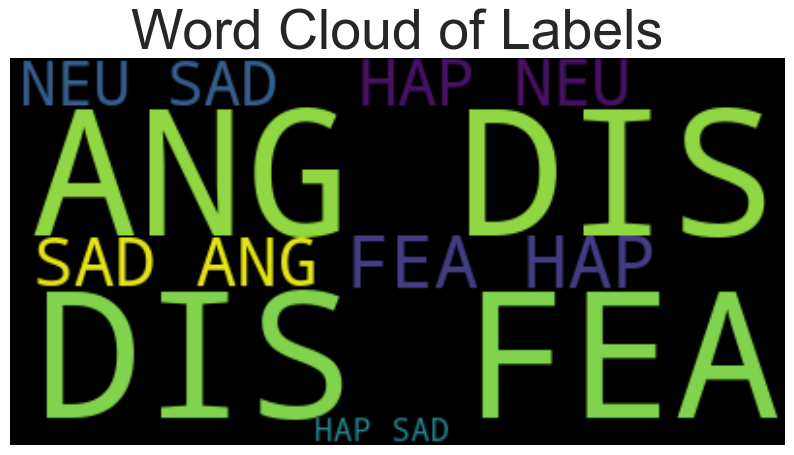

In [31]:
text = " ".join(df['label'])
wordcloud = WordCloud(width=400, height=200, background_color='black').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Labels', fontsize = 40)
plt.show()

<a id="modeling"></a>
**5. Modeling**

In [32]:
audio_arrays = []

for i in df['filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
df['Arrays'] = audio_arrays

In [33]:
def extract_feature(data):
    sample_rate = sr
    stft = np.abs(librosa.stft(data))
    result = np.array([])

    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfccs))

    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, chroma))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))

    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, contrast))

    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data), sr=sample_rate).T,axis=0)
    result = np.hstack((result, tonnetz))
    
    return result

In [34]:
import noisereduce as nr

def add_noise(audio_data, noise_level=0.005):
    noisy_audio = audio_data + noise_level * np.random.randn(len(audio_data))
    return noisy_audio

In [43]:
def get_features(data):
    result = []
    
    # without augmentation
    res1 = extract_feature(data)
    result.append(res1)
    
    # with noise
    noisy_data = add_noise(data)
    res2 = extract_feature(noisy_data)
    result.append(res2)
    
    return result

In [45]:
x = []
y = []
for i in range(len(df)):
    feature=get_features(df['Arrays'].iloc[i])
    for j in feature:
        x.append(j)
        y.append(df['label'].iloc[i])

In [46]:
le = LabelEncoder()
y = le.fit_transform(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.1)
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)
print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((13395, 193, 1), (13395,))
((1489, 193, 1), (1489,))


In [88]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(193,1)))#1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))                  #2
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  #3
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  #4
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                        #5                     
model.add(Activation('softmax'))
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
#plot_model(model, to_file='model.png')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 193, 128)          768       
                                                                 
 activation_50 (Activation)  (None, 193, 128)          0         
                                                                 
 dropout_40 (Dropout)        (None, 193, 128)          0         
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 24, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_41 (Conv1D)          (None, 24, 128)           82048     
                                                                 
 activation_51 (Activation)  (None, 24, 128)           0         
                                                     

![CNN model](image-1.png)

In [64]:
model_history=model.fit(X_train, y_train, batch_size=20, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
670/670 [==============================] - 16s 24ms/step - loss: 1.3344 - accuracy: 0.4487 - val_loss: 1.3529 - val_accuracy: 0.4533
Epoch 2/500
670/670 [==============================] - 15s 22ms/step - loss: 1.3397 - accuracy: 0.4535 - val_loss: 1.3388 - val_accuracy: 0.4426
Epoch 3/500
670/670 [==============================] - 15s 22ms/step - loss: 1.3338 - accuracy: 0.4549 - val_loss: 1.3286 - val_accuracy: 0.4533
Epoch 4/500
670/670 [==============================] - 15s 22ms/step - loss: 1.3210 - accuracy: 0.4631 - val_loss: 1.3560 - val_accuracy: 0.4385
Epoch 5/500
670/670 [==============================] - 15s 22ms/step - loss: 1.3392 - accuracy: 0.4526 - val_loss: 1.3472 - val_accuracy: 0.4426
Epoch 6/500
670/670 [==============================] - 14s 22ms/step - loss: 1.3352 - accuracy: 0.4539 - val_loss: 1.3246 - val_accuracy: 0.4681
Epoch 7/500
670/670 [==============================] - 15s 22ms/step - loss: 1.3300 - accuracy: 0.4598 - val_loss: 1.3120 - val_ac

In [77]:
predicted_probabilities = model.predict(X_test)

predicted_classes = predicted_probabilities.argmax(axis=-1)
print("Classification Report: \n", classification_report(y_test,predicted_classes))
print("Confusion Matrix: \n", confusion_matrix(y_test,predicted_classes))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, predicted_classes), 2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, predicted_classes), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test, predicted_classes)), 2))
print("Accuracy of the model: ", (100*round(accuracy_score(y_test, predicted_classes), 2)))
print("R-squared Score: ", round(r2_score(y_test, predicted_classes), 2))

47/47 [==============================] - 0s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       279
           1       0.37      0.49      0.42       255
           2       0.57      0.25      0.35       255
           3       0.48      0.37      0.41       243
           4       0.35      0.42      0.38       207
           5       0.49      0.65      0.56       250

    accuracy                           0.49      1489
   macro avg       0.50      0.48      0.47      1489
weighted avg       0.50      0.49      0.48      1489

Confusion Matrix: 
 [[198  37   4  26  14   0]
 [ 15 125   4  24  43  44]
 [ 21  34  63  29  33  75]
 [ 45  45  20  89  36   8]
 [  2  58   7  10  86  44]
 [  0  35  12   8  32 163]]
Mean Absolute Error:  1.15
Mean Squared Error:  3.16
Root Mean Squared Error:  1.78
Accuracy of the model:  49.0
R-squared Score:  -0.06


<a id = "conclusion"></a>
**6. Conclusion:**\
In conclusion, my journey into speech emotion prediction was challenging but immensely enlightening. While the model's accuracy didn't meet quite the expectations, but the experience deepened my understanding of working with audio data and the complexities of emotion recognition. I'm grateful for this opportunity during my internship at Coders Cave. 🚀 